### TODOS
- TODO: Implement volume for muscle groups. volume_chest, volume_back, etc.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv('workout.csv')

### 🔴 1. Descriptive Statistics
- Number of Workouts
- Number of Workouts (Per Category: PUSH, PULL, LEGS)
- Total Monthly Workout Duration
- TODO: Total Monthly Workout Duration (Per Category: PUSH, PULL, LEGS)
- Average Workout Duration 

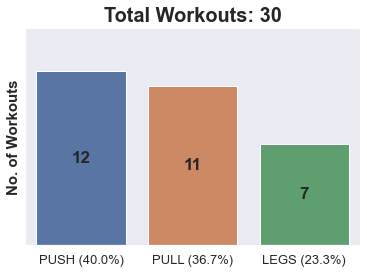

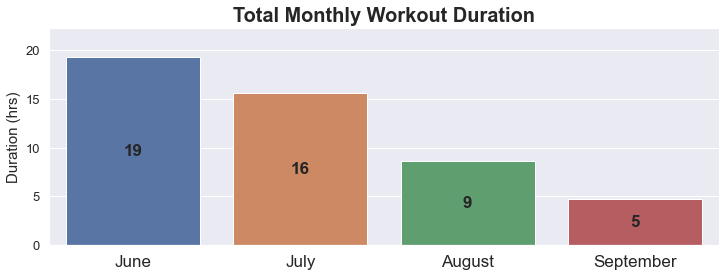

+-----------------------------+---------+
|   Stats (since June 2022)   |  Value  |
+=============================+=========+
| Total Workouts              | 30      |
+-----------------------------+---------+
| Average Workout Time (mins) | 99 mins |
+-----------------------------+---------+
| 0                           | 0       |
+-----------------------------+---------+
| 0                           | 0       |
+-----------------------------+---------+


In [13]:
'''DESCRIPTIVE STATISTICS'''

no_of_workouts = df.groupby(['Workout Start']).sum().shape[0]



figsize=(12,4)
legendsize=10
title_size=20
bar_label_size=17

# TODO: Display percentages also? 
no_of_workouts_per_category = df.copy()
no_of_workouts_per_category = no_of_workouts_per_category.groupby(['Workout Start', 'Name']).count()
no_of_workouts_per_category.reset_index(inplace=True)

# Keep the first word of the string only (e.g. a value "PULL - Better Gym Bath" which I use to note when I change gyms will become PULL and be aggregated with the rest of the PULL's)
no_of_workouts_per_category['Name'] = no_of_workouts_per_category['Name'].str.split().str.get(0)

# prepare input for barplot function
no_of_workouts_per_category = no_of_workouts_per_category['Name'].value_counts()
no_of_workouts_per_category = pd.DataFrame(no_of_workouts_per_category).transpose()

# extract percentages
percent_push = float(round(no_of_workouts_per_category['PUSH'] / no_of_workouts_per_category.sum().sum() * 100, 1))
percent_pull = float(round(no_of_workouts_per_category['PULL'] / no_of_workouts_per_category.sum().sum() * 100, 1))
percent_legs = float(round(no_of_workouts_per_category['LEGS'] / no_of_workouts_per_category.sum().sum() * 100, 1))
no_of_workouts_per_category.rename(columns={'PUSH': f'PUSH ({percent_push}%)', 'PULL': f'PULL ({percent_pull}%)', 'LEGS': f'LEGS ({percent_legs}%)'}, inplace=True)

# Plot
ax = sns.barplot(data=no_of_workouts_per_category)
plt.ylabel('No. of Workouts', size=15, fontweight='bold')      
plt.title(f'Total Workouts: {no_of_workouts}', fontweight='bold', size=title_size)

ax.bar_label(ax.containers[0], fontsize=bar_label_size, fontweight='bold', label_type='center') # Show values above bars
plt.ylim([0, no_of_workouts_per_category.max().max() + 3])     # Expand y axis range for visibility
ax.xaxis.set_tick_params(labelsize=13)                         # Enlarge x ticks
ax.get_yaxis().set_ticks([])                                   # Remove y ticks
plt.show()













# Setup: Workout Duration
workout_duration = df.copy()
workout_duration = workout_duration.groupby(['Workout Start', 'Workout End']).sum()
workout_duration.reset_index(inplace=True)
workout_duration['Workout Start'] = pd.to_datetime(workout_duration['Workout Start'], errors='coerce')
workout_duration['Workout End'] = pd.to_datetime(workout_duration['Workout End'], errors='coerce')
workout_duration['Duration (hrs)'] = (workout_duration['Workout End'] - workout_duration['Workout Start']).dt.total_seconds() / 60

# Total Monthly Workout Duration
monthly_workout_duration = workout_duration.groupby(workout_duration['Workout Start'].dt.month).sum()
monthly_workout_duration = monthly_workout_duration.reset_index()
monthly_workout_duration = monthly_workout_duration.drop(['Weight', 'Reps', 'Kcal', 'Distance'], axis=1)
monthly_workout_duration['Duration (hrs)'] /= 60
monthly_workout_duration['Workout Start'] = monthly_workout_duration['Workout Start'].map(
    { 1 : "January",
       2 : "February",
       3 : "March",
       4 : "April",
       5 : "May",
       6 : "June",
       7 : "July",
       8 : "August",
       9 : "September",
       10 : "October",
       11 : "November",
       12 : "December"})


# Monthly Workout Duration
sns.set_theme(style="darkgrid")
plt.figure(figsize=figsize)
ax = sns.barplot(x='Workout Start', y='Duration (hrs)', data=monthly_workout_duration, ci=None)
plt.xlabel('')
plt.ylabel('Duration (hrs)', fontsize=15)
plt.title('Total Monthly Workout Duration', fontsize=title_size, fontweight='bold')
ax.bar_label(ax.containers[0], fontsize=bar_label_size, fmt='%.0f', fontweight='bold', label_type='center') # Show values above bars
plt.ylim([0, monthly_workout_duration['Duration (hrs)'].max() + 3])     # Expand y axis range for visibility
ax.xaxis.set_tick_params(labelsize=17)                         # Enlarge x ticks
ax.yaxis.set_tick_params(labelsize=13)                         # Enlarge x ticks
plt.show()
# Display exact CGPs
monthly_workout_duration['CGPs'] = monthly_workout_duration['Duration (hrs)'] * 2















# Average Workout Duration
average_workout_duration = workout_duration['Duration (hrs)'].mean()



from texttable import Texttable
t = Texttable()
t.add_rows([['Stats (since June 2022)', 'Value'], 
            ['Total Workouts', no_of_workouts], 
            ['Average Workout Time (mins)', str(int(average_workout_duration)) + ' mins'],
            ['0', 0],
            ['0', 0],
           ])
print(t.draw())

In [14]:
#exercise_details = 'Incline Dumbbell Press (30°)'
#df[df.Exercise == exercise_details].drop(['Workout End', 'Notes', 'Kcal', 'Distance', 'Duration', 'Category', 'Name'], axis=1)

### 🔴 2. Calculate Volume Per Muscle Group Per Workout

In [15]:
'''
VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME 
VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME 
'''
# Preprocessing
# Keep only day on date 
df['Workout Start'] = pd.to_datetime(df['Workout Start'])
df['Workout End'] = pd.to_datetime(df['Workout Start'])

# Rename
df = df.rename(columns={'Workout Start': 'Date'})







# Derive volume (reps * weight) for each exercise 
df['Volume'] = df['Weight'] * df['Reps']
df_volume = df.groupby(['Date', 'Category', 'Exercise']).sum()

df_volume = df_volume.drop(['Weight', 'Reps', 'Kcal', 'Distance', 'Duration'], axis=1)
df_cardio = pd.DataFrame(df[df.Exercise == 'Running'].groupby(['Date', 'Exercise']).sum())
df_cardio = df_cardio.drop(['Weight', 'Reps', 'Kcal'], axis=1)
# Reset Index
df_volume.reset_index(inplace=True)
df_cardio.reset_index(inplace=True)


# Remove 0 values in volume where the exercise was probably not done but was not removed either
df_volume = df_volume[df_volume.Volume != 0]
df_cardio = df_cardio[df_cardio.Distance !=0]

# Manually double single-arm / single-leg volume
ex = ['High Cable Row', 'Decline Dumbbell Curls', 'Incline Dumbbell Curls', 'Rear Delt Flys', 'High Cable Flies',  'Incline Dumbbell Press (30°)',  'Lateral Cable Raises',  'Shoulder Dumbbell Press',  'Standing Calf Raises (bodyweight)']

for i in range(df_volume.shape[0]):
    if df_volume.iloc[i].Exercise in ex:
        df_volume.iloc[i, 3] = df_volume.iloc[i, 3] * 2


# Separate PUSH PULL LEGS
df_volume_chest = df_volume[(df_volume.Category == 'Chest')]
df_volume_shoulders = df_volume[(df_volume.Category == 'Shoulders')]
df_volume_triceps = df_volume[(df_volume.Category == 'Triceps')]
df_volume_back = df_volume[(df_volume.Category == 'Back')]
df_volume_biceps = df_volume[(df_volume.Category == 'Biceps')]
df_volume_legs = df_volume[(df_volume.Category == 'Legs')]
df_volume_abs = df_volume[(df_volume.Category == 'Abs')]

# 
df_workout_volume = pd.DataFrame(df_volume.groupby(['Category', 'Date']).sum())
df_workout_volume.reset_index(inplace=True)

### 🔴 3. TODO: Average Weight Per Muscle Group Per Workout

In [16]:
df_avg_weight = df.groupby(['Date', 'Category', 'Exercise']).mean().head(20)
df_avg_weight = df_avg_weight.drop(['Reps', 'Kcal', 'Distance', 'Duration'], axis=1)
df_avg_weight = df_avg_weight.reset_index()
df_avg_weight.head(10)

,Date,Category,Exercise,Weight,Volume
0,2022-06-06 20:45:00,Back,High Cable Row,10.000000,150.00
1,2022-06-06 20:45:00,Back,Lateral Pulldowns,35.000000,525.00
2,2022-06-06 20:45:00,Back,"Low Row (Technogym Machine, Lat Focused)",11.000000,165.00
3,2022-06-06 20:45:00,Back,"Mid Row (Lat, Technogym)",33.333333,500.00
4,2022-06-06 20:45:00,Biceps,Decline Dumbbell Curls,4.000000,60.00
5,2022-06-06 20:45:00,Biceps,Incline Dumbbell Curls,4.000000,60.00
6,2022-06-06 20:45:00,Biceps,Rope Hammer Curls,5.000000,60.00
7,2022-06-06 20:45:00,Cardio,Running,NaN,NaN
8,2022-06-06 20:45:00,Legs,Romanian Deadlifts (RDLs),40.000000,480.00
9,2022-06-06 20:45:00,Shoulders,Rear Delt Flys,1.250000,18.75


### 🔴 4. Plot Exercise Progression

In [17]:
# TODO: plot average weight per exercise too along with volume. This can be insightful because low weight high reps tends to achieve more volume. 
# TODO: plot % volume increase average for each exercise. This demonstrates progressive overload better than pure volume that can greately differ between RDLs and lateral raises.

In [18]:


def plot_volume():
    # Plot by muscle group
    muscle_groups = zip([df_volume_chest,
                  df_volume_shoulders,
                  df_volume_triceps,
                  df_volume_back,
                  df_volume_biceps,
                  df_volume_legs,
                  df_volume_abs],
                ['Chest', 
                 'Shoulders', 
                 'Triceps',
                'Back',
                'Biceps',
                'Legs'])


    for data, name in muscle_groups:
        sns.set_theme(style="darkgrid")
        plt.figure(figsize=figsize)
        sns.lineplot(x='Date', y='Volume', data=data, ci=None, hue='Exercise')
        sns.scatterplot(x='Date', y='Volume', data=data, ci=None, marker='o', s=70, hue='Exercise')
        plt.xlabel('Date', fontsize=15)
        plt.ylabel('Volume', fontsize=15)
        plt.title(f'{name} Workout Volume Progression', fontsize=20)
        plt.legend(loc='upper left', prop={'size': legendsize})
        plt.show()
        
def plot_cardio(data):
    # Plot Cardio
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=figsize)
    sns.barplot(x='Date', y='Distance', data=data, ci=None, hue='Exercise')
    #sns.scatterplot(x='Date', y='Distance', data=data, ci=None, marker='o', s=70, hue='Exercise')
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Distance', fontsize=15)
    plt.title(f'Cardio (Distance)', fontsize=20)
    plt.show()

    sns.set_theme(style="darkgrid")
    plt.figure(figsize=figsize)
    sns.barplot(x='Date', y='Duration', data=data, ci=None, hue='Exercise')
    #sns.scatterplot(x='Date', y='Duration', data=data, ci=None, marker='o', s=70, hue='Exercise')
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Duration', fontsize=15)
    plt.title('Cardio (Duration)', fontsize=20)
    plt.show()

In [19]:
df_volume_chest.sort_values('Date')

,Date,Category,Exercise,Volume
11,2022-06-08 20:46:00,Chest,Flat Chest Press (Technogym),1220.00
12,2022-06-08 20:46:00,Chest,High Cable Flies,657.50
13,2022-06-08 20:46:00,Chest,Incline Dumbbell Press (30°),944.00
37,2022-06-17 19:30:00,Chest,Flat Chest Press (Technogym),1792.50
38,2022-06-17 19:30:00,Chest,High Cable Flies,615.00
39,2022-06-17 19:30:00,Chest,Incline Dumbbell Press (30°),792.00
63,2022-06-22 20:21:00,Chest,Flat Chest Press (Technogym),1665.00
64,2022-06-22 20:21:00,Chest,High Cable Flies,735.00
65,2022-06-22 20:21:00,Chest,Incline Dumbbell Press (30°),888.00
73,2022-06-27 20:32:00,Chest,Incline Dumbbell Press (30°),880.00


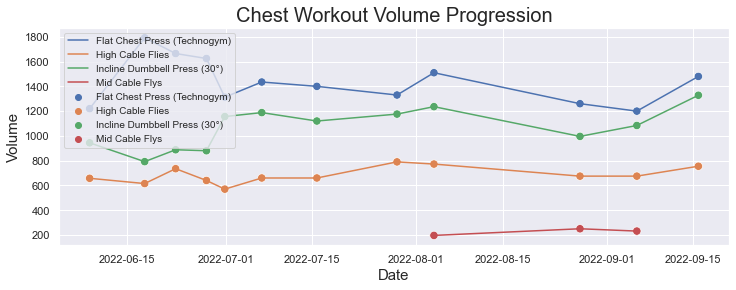

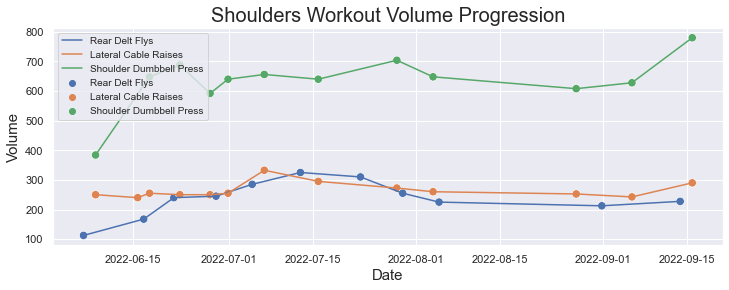

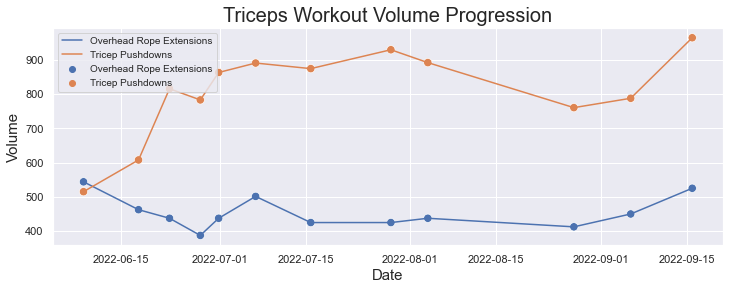

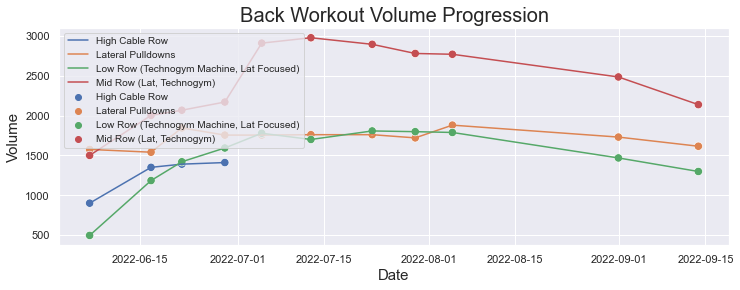

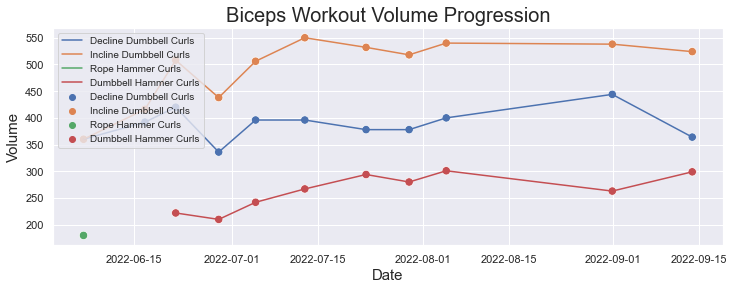

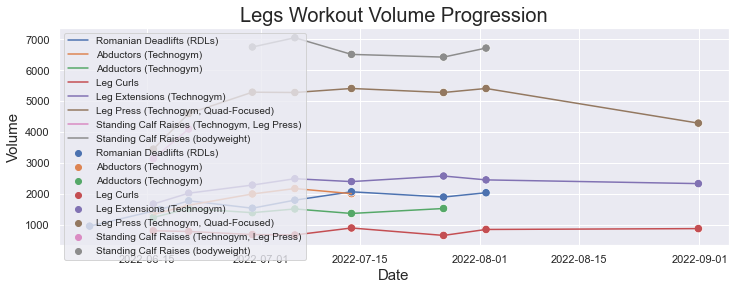

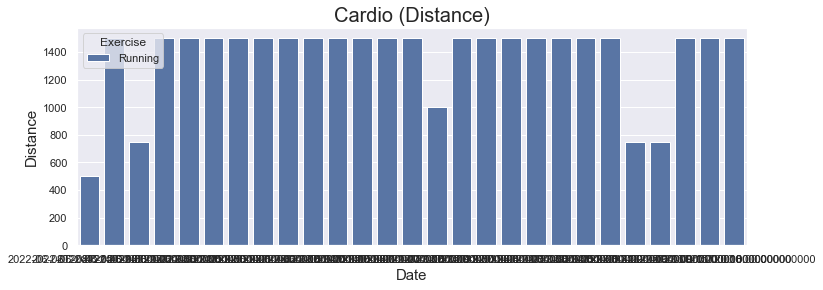

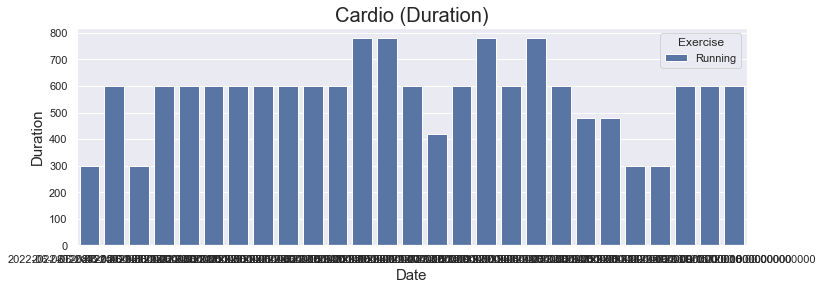

In [20]:
## '''STATISTICS TABLE'''
'''VOLUME PLOT'''
plot_volume()

'''CARDIO PLOT'''
plot_cardio(df_cardio)



# TODO: Plot Average Monthly Workout Duration (97mins, 95mins, 103mins, ...)